# Stage II

### Starts from 2020.6.1(Monday) - 2021.1.3(Sunday)

Generate weekly statistics (mean, median, mode) for number of cases and deaths across a specific "state".

Compare the data against other states (compare against 5 states). Normalize by population, use a normalization factor which is able to identify cases and deaths, for example try per 10,000 or 100,000 (this depends on the population). Plot the values across the weeks in a line plot for the 5 states in a single graph. Describe why the rates differ across these states in the notebook. Identify the peaks, do they compare with the US pattern?

Identify five counties within a state of your choice with high cases and death rates.

Plot weekly trends (cases and deaths) for the top 5 infected counties. Show plots by raw values and log normalized values. Describe what is causing them and what were the peaks. Do the counties follow state pattern?

## Modifying the Super Data
Firstly, I need to only get the states I'm working on it being NJ, AK, OH, SC, GA, NV.
Then I only need the dates from '2020-06-01' - '2021-01-03'. I rename columns that need to be changed and keep the rest. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

super_covid = pd.read_csv('super_COVID19_data.csv')

states = ['NJ','AK', 'OH', 'SC', 'GA', 'NV']

# filters out rows that aren't the states
super_states = super_covid.loc[super_covid['State'].isin(states)].reset_index(drop=True)

# drop duplicate column i.e. 'County Name'
super_states = super_states.drop(columns=['County Name_y'])

# rename the columns
super_states = super_states.rename(columns={'County Name_x': 'County Name', 'StateFIPS_cases': 'StateFIPS'})

# date range
start_date = '2020-06-01'
end_date = '2021-01-03'

# columns to drop that weren't between the '2020-06-01' and '2021-1-03'
columns_drop = [col for col in super_states.columns if (
    ('_cases' in col or '_deaths' in col) and not (start_date <= col.split('_')[0] <= end_date))]

# dropped columns
super_states = super_states.drop(columns=columns_drop)

super_states

# super_states.to_csv('super_covid_states.csv', index=False)

,countyFIPS,County Name,State,StateFIPS,2020-06-01_cases,2020-06-02_cases,2020-06-03_cases,2020-06-04_cases,2020-06-05_cases,2020-06-06_cases,...,2020-12-26_deaths,2020-12-27_deaths,2020-12-28_deaths,2020-12-29_deaths,2020-12-30_deaths,2020-12-31_deaths,2021-01-01_deaths,2021-01-02_deaths,2021-01-03_deaths,population
0,2013,Aleutians East Borough,AK,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3337
1,2016,Aleutians West Census Area,AK,2,0,0,0,0,3,0,...,0,0,0,0,0,0,0,0,0,5634
2,2020,Municipality of Anchorage,AK,2,232,235,250,258,263,271,...,137,138,138,139,141,141,142,142,142,288000
3,2050,Bethel Census Area,AK,2,3,3,3,3,3,3,...,15,15,15,15,15,15,15,15,15,18386
4,2060,Bristol Bay Borough,AK,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,45083,Spartanburg County,SC,45,637,645,650,687,701,743,...,366,371,371,372,388,392,392,398,405,319785
356,45085,Sumter County,SC,45,387,396,408,414,426,448,...,114,115,115,115,115,117,117,117,122,106721
357,45087,Union County,SC,45,37,40,40,40,40,41,...,39,39,39,39,39,41,41,42,43,27316
358,45089,Williamsburg County,SC,45,238,245,246,248,254,256,...,60,60,60,60,61,61,61,61,63,30368


## Change the columns from daily to weekly
Currently the dataframe is set to have all the days and we only need the weekly information. The data is cumulative by each day so the weekly '_cases' and '_deaths' isn't showing the actual cases or deaths for that week.

In [2]:
# extract the columns that have dates
date_columns = [col for col in super_states.columns if '_cases' in col or '_deaths' in col]

# extract the date from the column names (before the '_cases' or '_deaths')
dates_only = [pd.to_datetime(col.split('_')[0]) for col in date_columns]

# identify the weekly Sundays between the start and end date
weekly_sundays = pd.date_range(start=start_date, end=end_date, freq='W-SUN')

# create a list of columns that match these weekly Sunday dates - COLUMNS for Sundays 
sunday_columns = [f"{date.strftime('%Y-%m-%d')}_cases" if '_cases' in col else f"{date.strftime('%Y-%m-%d')}_deaths" 
                  for date, col in zip(dates_only, date_columns) if date in weekly_sundays]

# create a copy to be able to do the difference for each week
temp_super_state = super_states.copy()


# drop columns that are not in the weekly Sunday list
super_states_weekly = super_states.drop(columns=[col for col in date_columns if col not in sunday_columns])

# output the DataFrame with only weekly difference data
cumulative_states_weekly = super_states_weekly

cumulative_states_weekly

# cumulative_states_weekly.to_csv('cumulative_states_weekly.csv', index=False)

,countyFIPS,County Name,State,StateFIPS,2020-06-07_cases,2020-06-14_cases,2020-06-21_cases,2020-06-28_cases,2020-07-05_cases,2020-07-12_cases,...,2020-11-08_deaths,2020-11-15_deaths,2020-11-22_deaths,2020-11-29_deaths,2020-12-06_deaths,2020-12-13_deaths,2020-12-20_deaths,2020-12-27_deaths,2021-01-03_deaths,population
0,2013,Aleutians East Borough,AK,2,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3337
1,2016,Aleutians West Census Area,AK,2,0,0,0,0,5,0,...,0,0,0,0,0,0,0,0,0,5634
2,2020,Municipality of Anchorage,AK,2,275,334,373,432,568,733,...,58,66,70,83,103,112,127,138,142,288000
3,2050,Bethel Census Area,AK,2,3,4,6,10,13,15,...,3,6,9,10,13,13,13,15,15,18386
4,2060,Bristol Bay Borough,AK,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,45083,Spartanburg County,SC,45,782,959,1200,1470,1891,2459,...,247,251,262,275,299,323,345,371,405,319785
356,45085,Sumter County,SC,45,462,626,791,1001,1193,1419,...,92,94,97,100,103,107,111,115,122,106721
357,45087,Union County,SC,45,41,46,58,73,102,154,...,23,24,25,26,32,34,36,39,43,27316
358,45089,Williamsburg County,SC,45,256,286,333,383,435,487,...,50,50,50,51,52,54,56,60,63,30368


## Change so that the cases and the deaths are not cumulative weekly
Go through every column and change the entry to not be cumulative for the amount of cases and deaths for that specific week but instead have the the actual difference from the previous week. Now since we dropped the week prior to '2020-06-07' we use the date '2020-06-01' for that specific date. 

In [3]:
# for loop to go through every column in sunday_column 
for col in sunday_columns:
    
    # get the date part of the column
    col_date = pd.to_datetime(col.split('_')[0])
    
    # find the previous week's for col_date
    prev_week_col = f"{(col_date - pd.DateOffset(weeks=1)).strftime('%Y-%m-%d')}_cases" if '_cases' in col else f"{(col_date - pd.DateOffset(weeks=1)).strftime('%Y-%m-%d')}_deaths"
    
    # checks to see if it's in the specified dates
    if prev_week_col in temp_super_state.columns:
        
        # calculate the difference and ensure non-negative values
        super_states_weekly[col] = temp_super_state[col] - temp_super_state[prev_week_col]
        super_states_weekly[col] = super_states_weekly[col].clip(lower=0)  # Avoid negative values
        
    else:
        # if there's no previous week, set the week to 2020-06-01, this is specifically for the first week since the data starts from 2020-06-01
        adjust_date = '2020-06-01'
        prev_week_col = f"{adjust_date}_cases" if '_cases' in col else f"{adjust_date}_deaths"
        
        super_states_weekly[col] = temp_super_state[col] - temp_super_state[prev_week_col]
        super_states_weekly[col] = super_states_weekly[col].clip(lower=0) 


# output the DataFrame with only weekly difference data
super_states_weekly

# super_states_weekly.to_csv('non_cumulative_states_weekly.csv', index=False)



,countyFIPS,County Name,State,StateFIPS,2020-06-07_cases,2020-06-14_cases,2020-06-21_cases,2020-06-28_cases,2020-07-05_cases,2020-07-12_cases,...,2020-11-08_deaths,2020-11-15_deaths,2020-11-22_deaths,2020-11-29_deaths,2020-12-06_deaths,2020-12-13_deaths,2020-12-20_deaths,2020-12-27_deaths,2021-01-03_deaths,population
0,2013,Aleutians East Borough,AK,2,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3337
1,2016,Aleutians West Census Area,AK,2,0,0,0,0,5,0,...,0,0,0,0,0,0,0,0,0,5634
2,2020,Municipality of Anchorage,AK,2,43,59,39,59,136,165,...,5,8,4,13,20,9,15,11,4,288000
3,2050,Bethel Census Area,AK,2,0,1,2,4,3,2,...,0,3,3,1,3,0,0,2,0,18386
4,2060,Bristol Bay Borough,AK,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,45083,Spartanburg County,SC,45,145,177,241,270,421,568,...,9,4,11,13,24,24,22,26,34,319785
356,45085,Sumter County,SC,45,75,164,165,210,192,226,...,3,2,3,3,3,4,4,4,7,106721
357,45087,Union County,SC,45,4,5,12,15,29,52,...,5,1,1,1,6,2,2,3,4,27316
358,45089,Williamsburg County,SC,45,18,30,47,50,52,52,...,0,0,0,1,1,2,2,4,3,30368


# Statistics for each states
(Mean, Median, Mode)

I chose New Jersey. I went ahead and just printed the statistics for every other state I chose. 

In [4]:
# Statistics for each state before nom
for state in states:
    state_covid = super_states_weekly.loc[super_states_weekly['State'].isin([state])].reset_index(drop=True)
    
    state_cases = [col for col in state_covid.columns if '_cases' in col]
    state_deaths = [col for col in state_covid.columns if '_deaths' in col]
    
    state_cases_mean = state_covid[state_cases].mean().mean()
    state_cases_median = state_covid[state_cases].median().median()
    state_cases_mode = state_covid[state_cases].mode().iloc[0].mean()
    
    state_deaths_mean = state_covid[state_deaths].mean().mean()
    state_deaths_median = state_covid[state_deaths].median().median()
    state_deaths_mode = state_covid[state_deaths].mode().iloc[0].mean()
    
    print(f"Weekly Cases Statistics for {state}:")
    print(f"Mean: {state_cases_mean}")
    print(f"Median: {state_cases_median}")
    print(f"Mode: {state_cases_mode}")
    print("\n")
    print(f"Weekly Deaths Statistics for {state}:")
    print(f"Mean: {state_deaths_mean}")
    print(f"Median: {state_deaths_median}")
    print(f"Mode: {state_deaths_mode}")
    print("\n" + "="*40 + "\n")

Weekly Cases Statistics for NJ:
Mean: 585.0015360983102
Median: 148.0
Mode: 98.38709677419355


Weekly Deaths Statistics for NJ:
Mean: 11.500768049155145
Median: 4.0
Mode: 4.225806451612903


Weekly Cases Statistics for AK:
Mean: 53.380422691879865
Median: 3.0
Mode: 0.0967741935483871


Weekly Deaths Statistics for AK:
Mean: 0.27474972191323693
Median: 0.0
Mode: 0.0


Weekly Cases Statistics for OH:
Mean: 251.28445747800586
Median: 37.0
Mode: 48.32258064516129


Weekly Deaths Statistics for OH:
Mean: 2.5208944281524928
Median: 0.0
Mode: 0.0967741935483871


Weekly Cases Statistics for SC:
Mean: 217.05890603085552
Median: 79.5
Mode: 36.45161290322581


Weekly Deaths Statistics for SC:
Mean: 3.483169705469846
Median: 2.0
Mode: 0.41935483870967744


Weekly Cases Statistics for GA:
Mean: 104.91783323189289
Median: 29.0
Mode: 8.161290322580646


Weekly Deaths Statistics for GA:
Mean: 1.5396632176912153
Median: 0.0
Mode: 0.0


Weekly Cases Statistics for NV:
Mean: 414.74383301707775
Median: 

# Normalization and plotting of cases and deaths


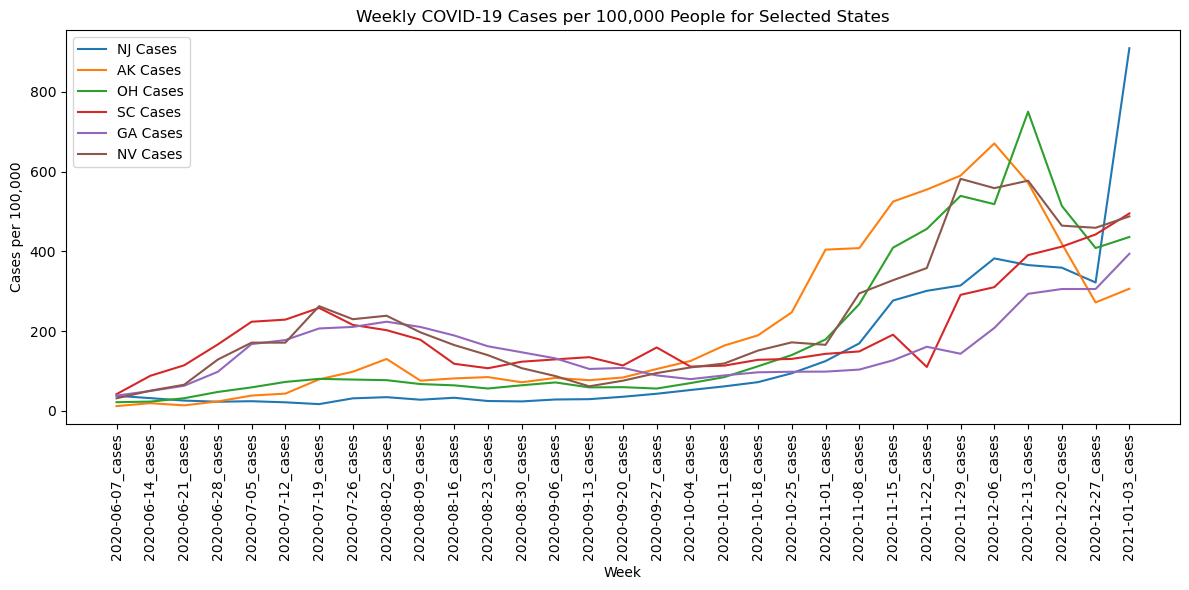

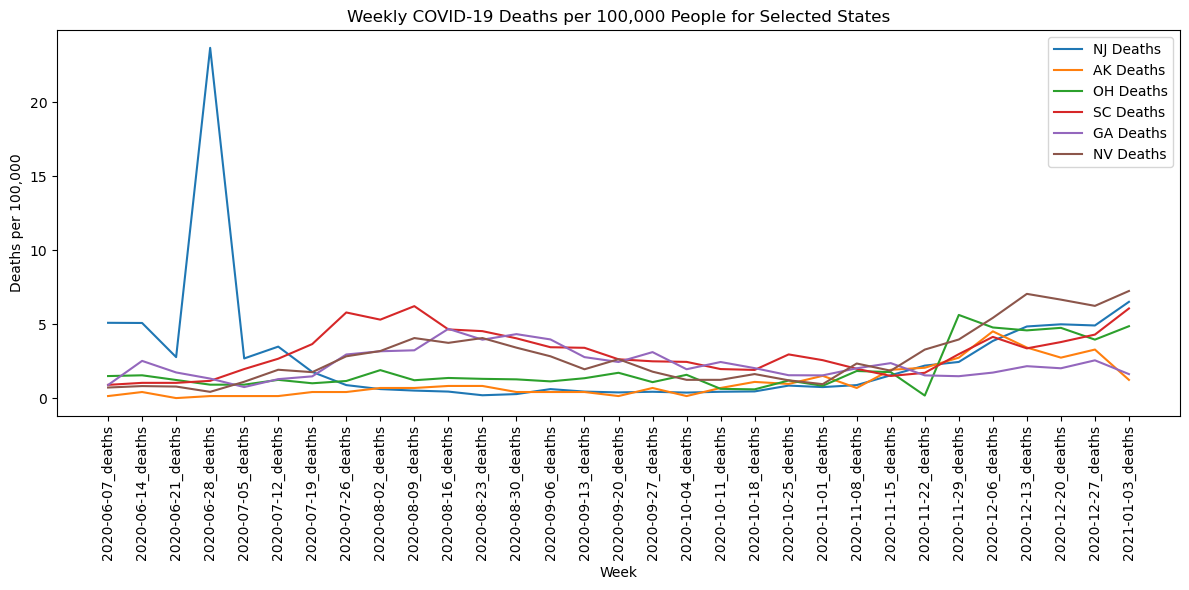

In [5]:
# Normalization factor (per 100,000 people)
normalization_factor = 100000

# Dictionary to store normalized data for each state
normalized_cases = {}
normalized_deaths = {}

# Loop through each state to normalize and calculate statistics
for state in states:
    # Filter data for the state
    state_data = super_states_weekly[super_states_weekly['State'] == state]
    
    # Sum up the population for the entire state
    total_population = state_data['population'].sum()
    
    # Normalize cases and deaths by population
    state_cases = state_data.filter(regex='_cases$').sum(axis=0)  # Sum across counties for each week
    state_deaths = state_data.filter(regex='_deaths$').sum(axis=0)  # Sum across counties for each week
    
    # Normalize by population (per 100,000)
    state_cases_normalized = (state_cases / total_population) * normalization_factor
    state_deaths_normalized = (state_deaths / total_population) * normalization_factor
    
    # Store the results in dictionaries
    normalized_cases[state] = state_cases_normalized
    normalized_deaths[state] = state_deaths_normalized

# Plotting the normalized cases across the weeks for each state
plt.figure(figsize=(12, 6))
for state in states:
    plt.plot(normalized_cases[state].index, normalized_cases[state], label=f'{state} Cases')

plt.title('Weekly COVID-19 Cases per 100,000 People for Selected States')
plt.xlabel('Week')
plt.ylabel('Cases per 100,000')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
# plt.savefig('states_cases_weekly.jpg')
plt.show()

# Plotting the normalized deaths across the weeks for each state
plt.figure(figsize=(12, 6))
for state in states:
    plt.plot(normalized_deaths[state].index, normalized_deaths[state], label=f'{state} Deaths')

plt.title('Weekly COVID-19 Deaths per 100,000 People for Selected States')
plt.xlabel('Week')
plt.ylabel('Deaths per 100,000')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
# plt.savefig('states_deaths_weekly.jpg')
plt.show()


# Describe why the rates differ across these states in the notebook. Identify the peaks, do they compare with the US pattern?
The rates differ across the states because some unlike others have a larger population, have more tourists coming in and out of the state, are a larger hub for gathering. The peaks compare to those of the U.S by having an increase of cases by the end of the year for 2020 and beginning of the year for 2021. 

# 5 Counties for NJ
Identify five counties within a state of your choice with high cases and death rates

Plot weekly trends (cases and deaths) for the top 5 infected counties. Show plots by raw values and log normalized values. Describe what is causing them and what were the peaks. Do the counties follow state pattern?

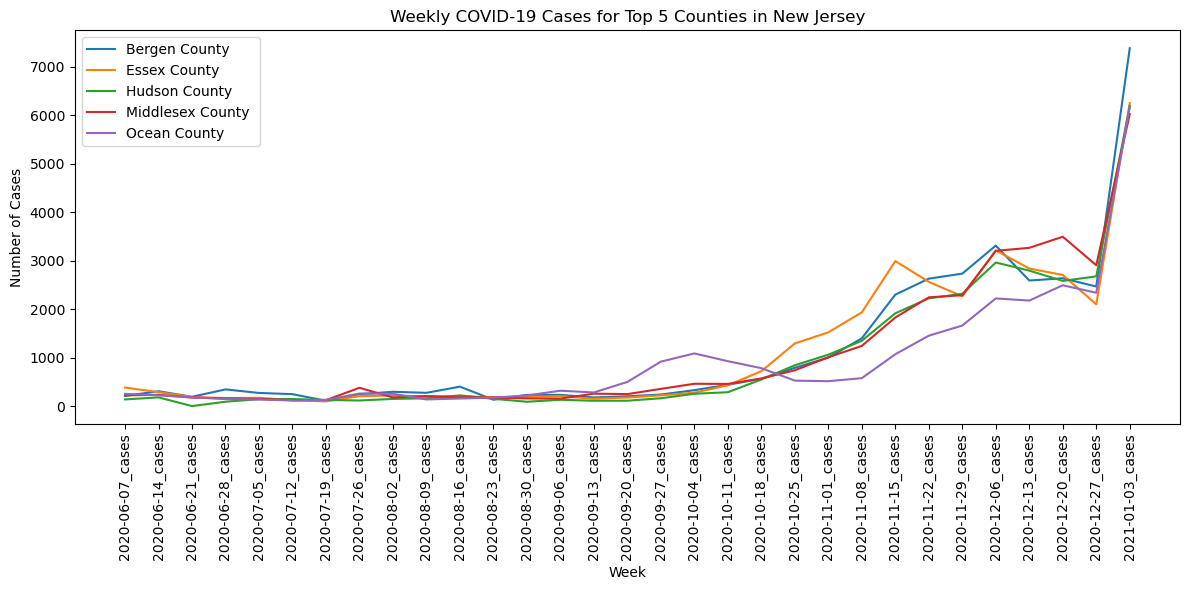

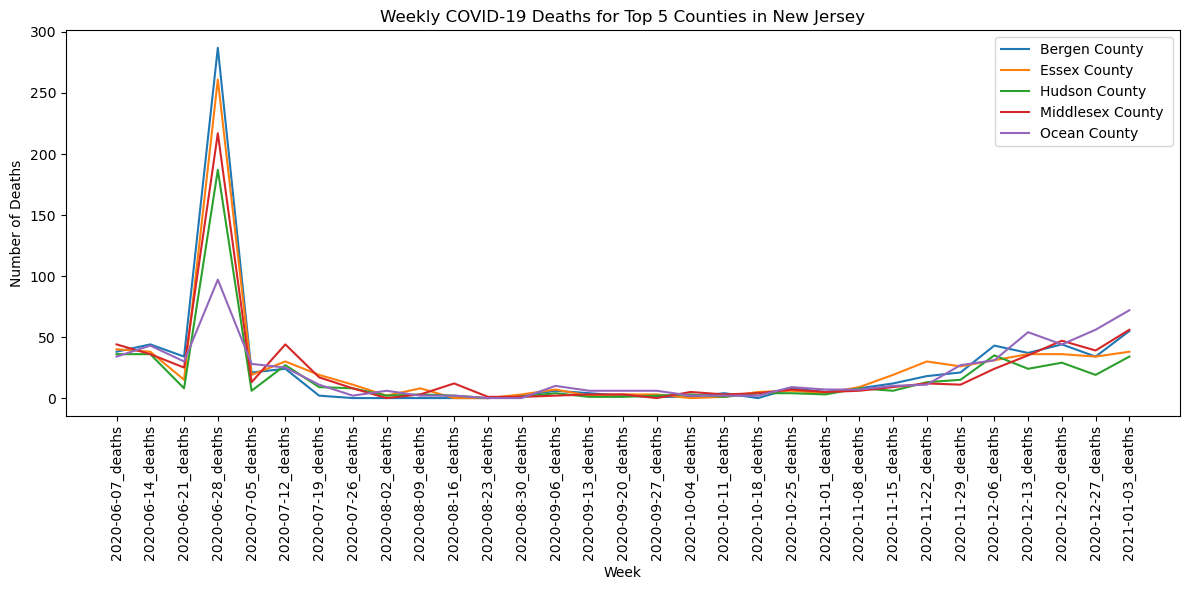

In [6]:
nj_data = super_states_weekly.loc[super_states_weekly['State'].isin(['NJ'])].reset_index(drop=True)

nj_data['total_cases'] = nj_data.filter(regex='_cases$').sum(axis=1)
nj_data['total_deaths'] = nj_data.filter(regex='_deaths$').sum(axis=1)

top_5_counties = nj_data.groupby('County Name').agg({'total_cases': 'sum', 'total_deaths': 'sum'}).nlargest(5, 'total_cases').index

nj_data = nj_data.drop(columns=['total_cases', 'total_deaths'])

top_counties = nj_data.loc[nj_data['County Name'].isin(top_5_counties)].reset_index(drop=True)

plt.figure(figsize=(12, 6))
for county in top_counties['County Name'].unique():
    county_data = top_counties[top_counties['County Name'] == county]
    
    # Sum the weekly cases columns for each county
    weekly_cases = county_data.filter(regex='_cases$').sum(axis=0)
    plt.plot(weekly_cases.index, weekly_cases.values, label=f'{county}')

plt.title('Weekly COVID-19 Cases for Top 5 Counties in New Jersey')
plt.xlabel('Week')
plt.ylabel('Number of Cases')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
# plt.savefig('counties_cases_weekly.jpg')
plt.show()

plt.figure(figsize=(12, 6))
for county in top_counties['County Name'].unique():
    county_data = top_counties[top_counties['County Name'] == county]
    
    # Sum the weekly deaths columns for each county
    weekly_deaths = county_data.filter(regex='_deaths$').sum(axis=0)
    plt.plot(weekly_deaths.index, weekly_deaths.values, label=f'{county}')

plt.title('Weekly COVID-19 Deaths for Top 5 Counties in New Jersey')
plt.xlabel('Week')
plt.ylabel('Number of Deaths')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
# plt.savefig('counties_deaths_weekly.jpg')
plt.show()

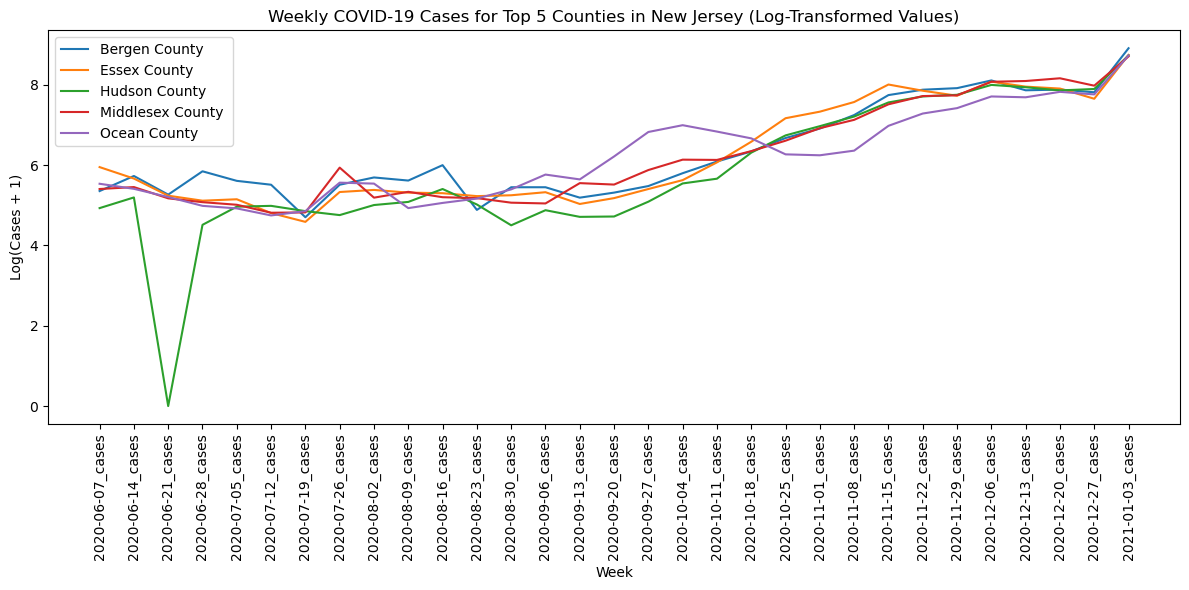

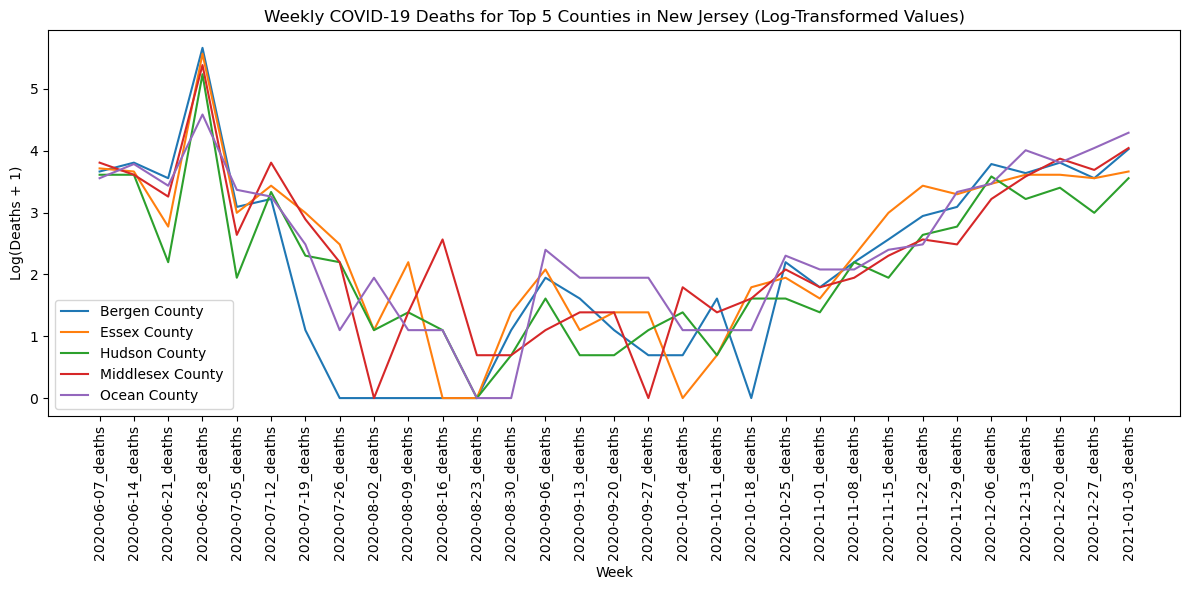

In [7]:
# Plotting log-transformed weekly case values for the top 5 counties
plt.figure(figsize=(12, 6))
for county in top_counties['County Name'].unique():
    county_data = top_counties[top_counties['County Name'] == county]
    # Sum the weekly cases for each county and apply log normalization
    weekly_cases = county_data.filter(regex='_cases$').sum(axis=0)
    plt.plot(weekly_cases.index, np.log1p(weekly_cases.values), label=f'{county}')

plt.title('Weekly COVID-19 Cases for Top 5 Counties in New Jersey (Log-Transformed Values)')
plt.xlabel('Week')
plt.ylabel('Log(Cases + 1)')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
# plt.savefig('counties_cases_log.jpg')
plt.show()

# Plotting log-transformed weekly death values for the top 5 counties
plt.figure(figsize=(12, 6))
for county in top_counties['County Name'].unique():
    county_data = top_counties[top_counties['County Name'] == county]
    # Sum the weekly deaths for each county and apply log normalization
    weekly_deaths = county_data.filter(regex='_deaths$').sum(axis=0)
    plt.plot(weekly_deaths.index, np.log1p(weekly_deaths.values), label=f'{county}')

plt.title('Weekly COVID-19 Deaths for Top 5 Counties in New Jersey (Log-Transformed Values)')
plt.xlabel('Week')
plt.ylabel('Log(Deaths + 1)')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
# plt.savefig('counties_deaths_log.jpg')
plt.show()


# Describe what is causing them and what were the peaks. Do the counties follow state pattern?

The peaks were towards the end of the year for 2020 and beginning of the new year for 2021. This could be caused by traveling season and people start to get more sick as they settle back. It matches the state because for an unknown reason all counties had a peak of COVID deaths around the week of 2020-06-21 and 2020-07-05. 